In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#1
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape)
test.shape

(42000, 785)


(28000, 784)

In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
train.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29374,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7673,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33109,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23572,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10654,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16166,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x=train.drop(['label'],axis=1) # without label column, we are creating X 
y=train['label'] # Only label column, we are creating Y 

In [8]:
print(x)
print('-'*50)
print(y)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0       0   
11          0       0       

In [9]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state =0)

# Modelling

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Prediction

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
score = classifier.score(X_test, y_test)
print(score)

0.9056190476190477


In [13]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9056190476190477

# Confusion matrix

In [14]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[ 966,    0,    5,    4,    3,    5,   16,    1,   13,    2],
       [   0, 1134,   13,    7,    1,    3,    4,    1,   22,    5],
       [  13,   14,  952,   25,   12,    5,   11,   14,   28,    3],
       [   5,    9,   32,  935,    3,   34,    5,    7,   26,   14],
       [   6,   11,    9,    3,  938,    4,    7,    1,   15,   40],
       [  10,   14,    4,   32,    7,  801,   16,    3,   32,   11],
       [   5,    0,   11,    0,    9,   18,  994,    0,    7,    0],
       [   6,   10,   13,    5,   15,    3,    1, 1031,    6,   39],
       [   6,   14,    6,   29,    5,   34,   12,    3,  870,   16],
       [   3,    2,    6,   14,   26,   10,    0,   50,   17,  888]],
      dtype=int64)

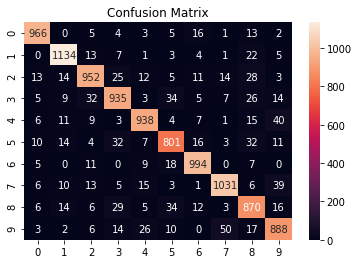

In [15]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [16]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1015
          1       0.94      0.95      0.95      1190
          2       0.91      0.88      0.89      1077
          3       0.89      0.87      0.88      1070
          4       0.92      0.91      0.91      1034
          5       0.87      0.86      0.87       930
          6       0.93      0.95      0.94      1044
          7       0.93      0.91      0.92      1129
          8       0.84      0.87      0.86       995
          9       0.87      0.87      0.87      1016

avg / total       0.91      0.91      0.91     10500



In [21]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.32866666666666666
Mean Squared Error:  1.5263809523809524
Root Mean Squared Error:  1.2354679082764362


# R2 method

In [22]:
print(metrics.r2_score(y_test, y_pred))

0.8155486328835713


# Log Loss

In [34]:
pred = classifier.predict_proba(X_test)
eval = log_loss(y_test,pred)
eval

0.5308869577121045